In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
car_data = pd.read_csv('car_data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
# Mapping for categorical columns
fuel_type_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
seller_type_mapping = {'Dealer': 0, 'Individual': 1}
transmission_mapping = {'Manual': 0, 'Automatic': 1}

# Apply the mapping to the DataFrame
car_data['Fuel_Type'] = car_data['Fuel_Type'].map(fuel_type_mapping)
car_data['Seller_Type'] = car_data['Seller_Type'].map(seller_type_mapping)
car_data['Transmission'] = car_data['Transmission'].map(transmission_mapping)

numeric_columns = car_data.select_dtypes(include=['int64', 'float64']).columns

In [3]:
#To check the initial statistical features of the data
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


From above analysis one can say that -
1. The data here contains cars with manufacturing year 2003 to 2018.
2. The lowest price on which car was sold is INR 10,000 / -
3. The highest price on which the car was sold is INR 35 lacs.
4. There are 301 recoords in the data.

In [4]:
#To look at the variables in detail
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

From above analysis one can say that -
1. None of the variables or columns here have null values.
2. Variables "Car_Name" , "Fuel_Type" ,"Seller_Type" and "Transmission" are non numeric in nature.

## 1. From which manufacturing year to which manufacturing year vehicles are present in this data ?

In [6]:
min_year = car_data['Year'].min()
max_year = car_data['Year'].max()
print(f"Vehicles are present from the year {min_year} to {max_year}.")

Vehicles are present from the year 2003 to 2018.


## 2. What is the lowest price to which a vehicle is sold ?

In [7]:
lowest_price = car_data['Selling_Price'].min()
print(f"The lowest selling price of a vehicle is {lowest_price}.")

The lowest selling price of a vehicle is 0.1.


## 3. What is the highest price to which a vehicle is sold ?

In [8]:
highest_price = car_data['Selling_Price'].max()
print(f"The highest selling price of a vehicle is {highest_price}.")

The highest selling price of a vehicle is 35.0.


## 4. How many records are there in this data ?

In [9]:
num_records = car_data.shape[0]
print(f"There are {num_records} records in this data.")

There are 301 records in this data.


## 5. Are there any missing records in this data ?

In [10]:
missing_records = car_data.isnull().sum()
print("Missing records in each column:")
print(missing_records)

Missing records in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


## 6. How many different vehicles are present in this data ?

There are 98 different vehicles in this data.


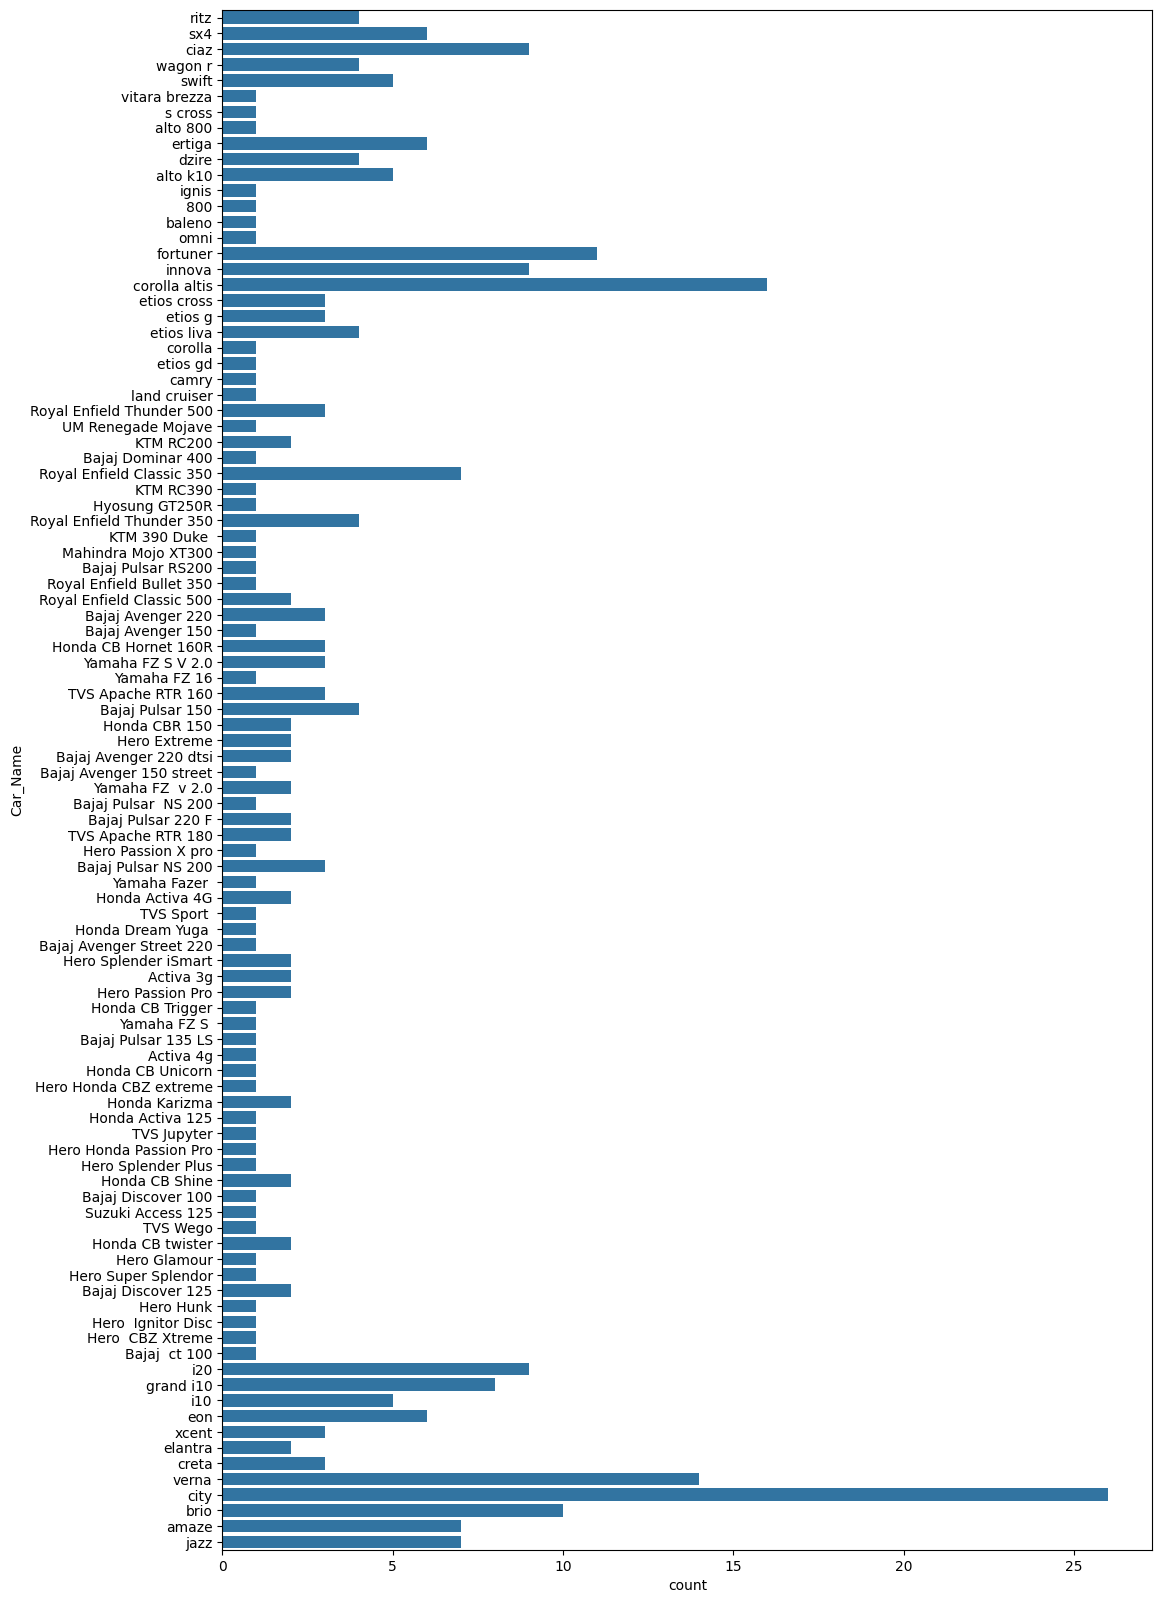

In [11]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = car_data.Car_Name,ax=ax, data = car_data)

num_different_vehicles = car_data['Car_Name'].nunique()
print(f"There are {num_different_vehicles} different vehicles in this data.")

## 7. Which is the most sold vehicle in this data ?

In [12]:
most_sold_vehicle = car_data['Car_Name'].value_counts().idxmax()
print(f"The most sold vehicle is {most_sold_vehicle}.")

The most sold vehicle is city.


## 8. Does the database include any CNG vehicle ? If yes how many of them are there ?

In [13]:
cng_vehicles = car_data[car_data['Fuel_Type'] == 2]
num_cng_vehicles = cng_vehicles.shape[0]
print(f"There are {num_cng_vehicles} CNG vehicles in the data.")

There are 2 CNG vehicles in the data.


## 9. How many vehicles here are for sell from Individuals directly ?

In [14]:
individual_vehicles = car_data[car_data['Seller_Type'] == 1]
num_individual_vehicles = individual_vehicles.shape[0]
print(f"There are {num_individual_vehicles} vehicles for sale from individuals directly.")

There are 106 vehicles for sale from individuals directly.


## 10. Does this database contain auto transmission vehicles ? If yes how many of them are there?

In [15]:
auto_transmission_vehicles = car_data[car_data['Transmission'] == 1]
num_auto_transmission_vehicles = auto_transmission_vehicles.shape[0]
print(f"There are {num_auto_transmission_vehicles} vehicles with automatic transmission in the data.")

There are 40 vehicles with automatic transmission in the data.


## 11. How many single person owned vehicles are there in this database ?

In [16]:
single_owner_vehicles = car_data[car_data['Owner'] == 1]
num_single_owner_vehicles = single_owner_vehicles.shape[0]
print(f"There are {num_single_owner_vehicles} single person owned vehicles in the database.")

There are 10 single person owned vehicles in the database.


## 12. Which is the most and least cost depreciated vehicle in data ?

In [17]:
# Calculate depreciation for each vehicle
car_data['Depreciation'] = car_data['Present_Price'] - car_data['Selling_Price']
# Append 'Depreciation' to numeric columns
numeric_columns = numeric_columns.append(pd.Index(['Depreciation']))

# Find the most depreciated vehicle
most_depreciated_vehicle = car_data.loc[car_data['Depreciation'].idxmax()]

# Find the least depreciated vehicle
least_depreciated_vehicle = car_data.loc[car_data['Depreciation'].idxmin()]

print("Most depreciated vehicle:")
print(most_depreciated_vehicle)

print("\nLeast depreciated vehicle:")
print(least_depreciated_vehicle)

Most depreciated vehicle:
Car_Name         land cruiser
Year                     2010
Selling_Price            35.0
Present_Price            92.6
Kms_Driven              78000
Fuel_Type                   1
Seller_Type                 0
Transmission                0
Owner                       0
Depreciation             57.6
Name: 86, dtype: object

Least depreciated vehicle:
Car_Name         Honda Activa 4G
Year                        2017
Selling_Price               0.48
Present_Price               0.51
Kms_Driven                  4300
Fuel_Type                      0
Seller_Type                    1
Transmission                   1
Owner                          0
Depreciation                0.03
Name: 155, dtype: object


## 13. Which brands of vehicles are less affected by cost depreciation ?

In [18]:
# Calculate average depreciation for each brand
average_depreciation = car_data.groupby('Car_Name')['Depreciation'].mean()

# Sort the brands by average depreciation in ascending order
less_affected_brands = average_depreciation.sort_values()

print("Brands of vehicles less affected by cost depreciation:")
print(less_affected_brands)

Brands of vehicles less affected by cost depreciation:
Car_Name
TVS Sport              0.040000
Honda Activa 4G        0.045000
Hero Passion X pro     0.050000
Bajaj Avenger 150      0.050000
Honda Dream Yuga       0.060000
                        ...    
corolla altis         10.399375
corolla               10.850000
fortuner              12.047273
camry                 21.230000
land cruiser          57.600000
Name: Depreciation, Length: 98, dtype: float64


## 14. Are there any factors which you feel affect the cost depreciation ?

In [19]:
numeric_columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Depreciation'],
      dtype='object')

Correlation of various factors with Depreciation:
Depreciation     1.000000
Present_Price    0.864902
Selling_Price    0.520881
Kms_Driven       0.333832
Fuel_Type        0.252129
Transmission     0.237802
Owner            0.107415
Year            -0.333746
Seller_Type     -0.336902
Name: Depreciation, dtype: float64


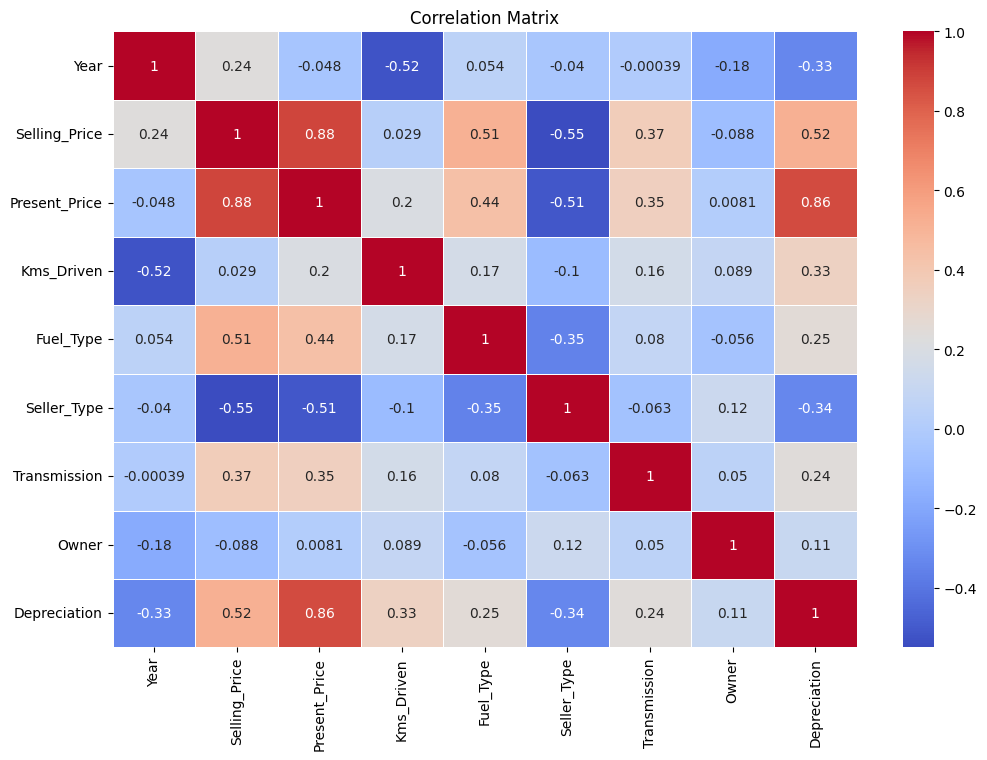

In [21]:
# # Calculate the correlation between Depreciation and other numeric columns
depreciation_correlation = car_data[numeric_columns].corr()['Depreciation'].sort_values(ascending=False)
print("Correlation of various factors with Depreciation:")
print(depreciation_correlation)

#To check the correlation of different variables look at the heatmap
cor = car_data[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 15. In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?

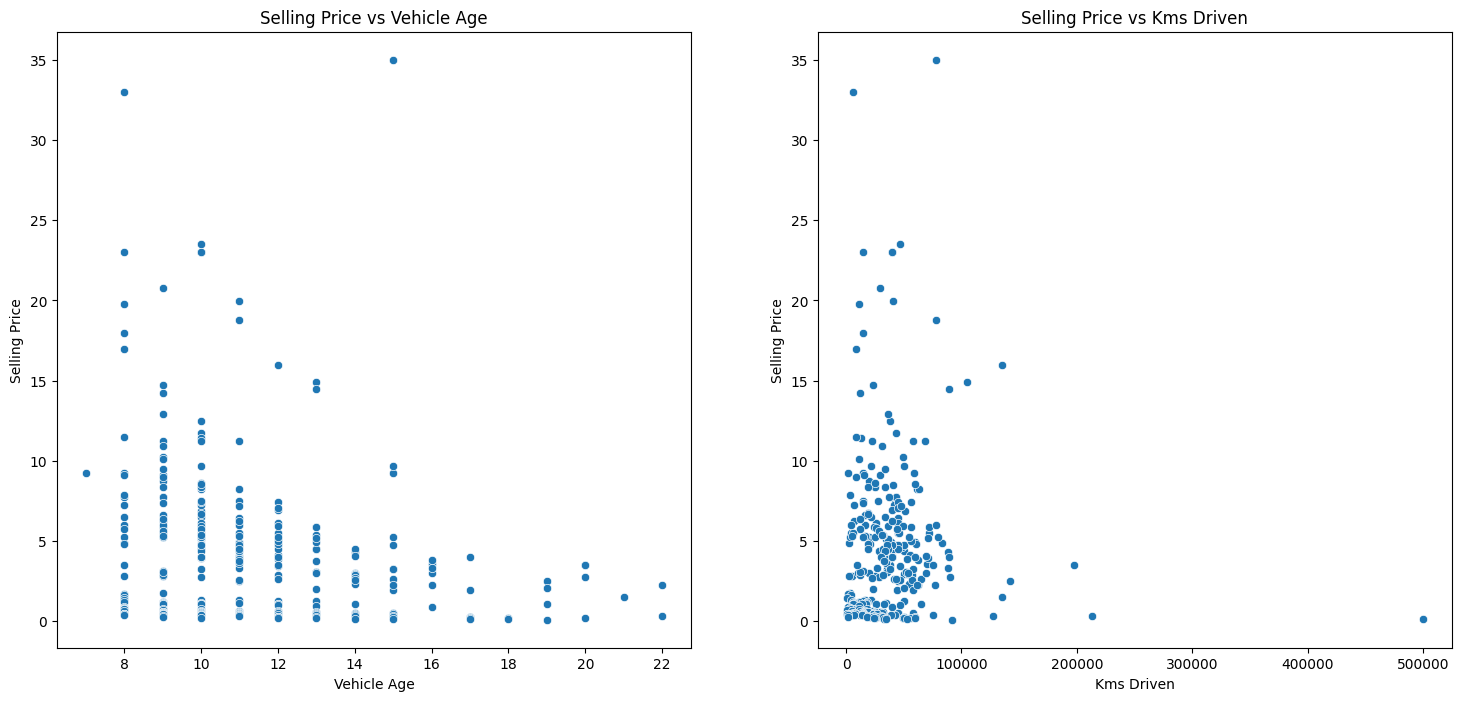

In [22]:
# Calculate the age of the vehicle
car_data['Vehicle_Age'] = 2025 - car_data['Year']

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
# Plot the relationship between Selling Price and Vehicle Age
sns.scatterplot(x='Vehicle_Age', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Selling Price')
# plt.show()

plt.subplot(1, 2, 2)
# Plot the relationship between Selling Price and Kms Driven
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.show()

## 16. Can we get idea about newest vehicles i.e. after 2014 manufactured ?

In [23]:
newest_vehicles = car_data[car_data['Year'] > 2014]
newest_vehicles

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Vehicle_Age
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2.60,8
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0,0.58,7
6,ciaz,2015,6.75,8.12,18796,0,0,0,0,1.37,10
7,s cross,2015,6.50,8.61,33429,1,0,0,0,2.11,10
8,ciaz,2016,8.75,8.89,20273,1,0,0,0,0.14,9
...,...,...,...,...,...,...,...,...,...,...,...
295,city,2015,8.55,13.09,60076,1,0,0,0,4.54,10
296,city,2016,9.50,11.60,33988,1,0,0,0,2.10,9
297,brio,2015,4.00,5.90,60000,0,0,0,0,1.90,10
299,city,2017,11.50,12.50,9000,1,0,0,0,1.00,8


## 17. Can we find out data of only two wheelers from this data ?

In [24]:
# List of keywords associated with two-wheelers
two_wheeler_keywords = ['Activa', 'Bajaj', 'Hero', 'Honda', 'Hyosung', 'Suzuki', 'TVS']

# Filter the data to include only two-wheelers
two_wheelers = car_data[car_data['Car_Name'].str.contains('|'.join(two_wheeler_keywords), case=False)]

print("Data of only two-wheelers:")
two_wheelers

Data of only two-wheelers:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Vehicle_Age
103,Bajaj Dominar 400,2017,1.45,1.60,1200,0,1,0,0,0.15,8
106,Hyosung GT250R,2014,1.35,3.45,16500,0,1,0,1,2.10,11
120,Bajaj Pulsar RS200,2016,1.05,1.26,5700,0,1,0,0,0.21,9
126,Bajaj Avenger 220,2017,0.90,0.95,1300,0,1,0,0,0.05,8
127,Bajaj Avenger 150,2016,0.75,0.80,7000,0,1,0,0,0.05,9
...,...,...,...,...,...,...,...,...,...,...,...
196,Activa 3g,2008,0.17,0.52,500000,0,1,1,0,0.35,17
197,Honda CB twister,2010,0.16,0.51,33000,0,1,0,0,0.35,15
198,Bajaj Discover 125,2011,0.15,0.57,35000,0,1,0,1,0.42,14
199,Honda CB Shine,2007,0.12,0.58,53000,0,1,0,0,0.46,18


## 18. Which is the oldest bike sold here?

In [25]:
oldest_bike = two_wheelers.loc[two_wheelers['Year'].idxmin()]
print("The oldest bike sold is:")
print(oldest_bike)

The oldest bike sold is:
Car_Name         Hero Super Splendor
Year                            2005
Selling_Price                    0.2
Present_Price                   0.57
Kms_Driven                     55000
Fuel_Type                          0
Seller_Type                        1
Transmission                       0
Owner                              0
Depreciation                    0.37
Vehicle_Age                       20
Name: 189, dtype: object


## 19. Which is the newest bike sold here?

In [26]:
newest_bike = two_wheelers.loc[two_wheelers['Year'].idxmax()]
print("The newest bike sold is:")
print(newest_bike)

The newest bike sold is:
Car_Name         Bajaj Dominar 400
Year                          2017
Selling_Price                 1.45
Present_Price                  1.6
Kms_Driven                    1200
Fuel_Type                        0
Seller_Type                      1
Transmission                     0
Owner                            0
Depreciation                  0.15
Vehicle_Age                      8
Name: 103, dtype: object


## 20. Which is the most sold bike here?

In [27]:
most_sold_bike = two_wheelers['Car_Name'].value_counts().idxmax()
print(f"The most sold bike is {most_sold_bike}.")

The most sold bike is Bajaj Pulsar 150.


## 21. Do you find any deal in two wheelers which exceeded the general expectation ? 

In [28]:
# Define a threshold for low depreciation
low_depreciation_threshold = 0.1

# Find two-wheelers with depreciation below the threshold
exceptional_deals = two_wheelers[two_wheelers['Depreciation'] < low_depreciation_threshold]

print("Exceptional deals in two-wheelers:")
exceptional_deals

Exceptional deals in two-wheelers:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Vehicle_Age
126,Bajaj Avenger 220,2017,0.90,0.95,1300,0,1,0,0,0.05,8
127,Bajaj Avenger 150,2016,0.75,0.80,7000,0,1,0,0,0.05,9
128,Honda CB Hornet 160R,2017,0.80,0.87,3000,0,1,0,0,0.07,8
135,Bajaj Pulsar 150,2015,0.65,0.74,5000,0,1,0,0,0.09,10
151,Hero Passion X pro,2016,0.50,0.55,31000,0,1,0,0,0.05,9
155,Honda Activa 4G,2017,0.48,0.51,4300,0,1,1,0,0.03,8
156,TVS Sport,2017,0.48,0.52,15000,0,1,0,0,0.04,8
158,Honda Dream Yuga,2017,0.48,0.54,8600,0,1,0,0,0.06,8
159,Honda Activa 4G,2017,0.45,0.51,4000,0,1,1,0,0.06,8
164,Hero Splender iSmart,2016,0.45,0.54,14000,0,1,0,0,0.09,9


## 22. Can you find reason for it ?

In [29]:
# Compare the features of exceptional deals with the rest of the two-wheelers
rest_two_wheelers = two_wheelers[~two_wheelers.index.isin(exceptional_deals.index)]

# Calculate the mean values of relevant features for both groups
exceptional_deals_mean = exceptional_deals[['Kms_Driven', 'Vehicle_Age', 'Depreciation']].mean()
rest_two_wheelers_mean = rest_two_wheelers[['Kms_Driven', 'Vehicle_Age', 'Depreciation']].mean()

# Print the comparison
print("Mean values of relevant features for exceptional deals:")
print(exceptional_deals_mean)
print("\nMean values of relevant features for the rest of the two-wheelers:")
print(rest_two_wheelers_mean)

Mean values of relevant features for exceptional deals:
Kms_Driven      8518.181818
Vehicle_Age        8.545455
Depreciation       0.061818
dtype: float64

Mean values of relevant features for the rest of the two-wheelers:
Kms_Driven      37563.271186
Vehicle_Age        12.338983
Depreciation        0.372881
dtype: float64


## 23. Can we find out data of only cars from this data ?

In [30]:
# List of keywords associated with two-wheelers
two_wheeler_keywords = ['Activa', 'Bajaj', 'Hero', 'Honda', 'Hyosung', 'Suzuki', 'TVS']

# Filter the data to exclude two-wheelers
cars = car_data[~car_data['Car_Name'].str.contains('|'.join(two_wheeler_keywords), case=False)]

print("Data of only cars:")
cars

Data of only cars:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,2.24,11
1,sx4,2013,4.75,9.54,43000,1,0,0,0,4.79,12
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2.60,8
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,1.30,14
4,swift,2014,4.60,6.87,42450,1,0,0,0,2.27,11
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0,2.10,9
297,brio,2015,4.00,5.90,60000,0,0,0,0,1.90,10
298,city,2009,3.35,11.00,87934,0,0,0,0,7.65,16
299,city,2017,11.50,12.50,9000,1,0,0,0,1.00,8


## 24. Which is the oldest car sold here?

In [31]:
oldest_car = cars.loc[cars['Year'].idxmin()]
print("The oldest car sold is:")
oldest_car

The oldest car sold is:


Car_Name            800
Year               2003
Selling_Price      0.35
Present_Price      2.28
Kms_Driven       127000
Fuel_Type             0
Seller_Type           1
Transmission          0
Owner                 0
Depreciation       1.93
Vehicle_Age          22
Name: 37, dtype: object

## 25. Which is the newest car sold here?

In [32]:
newest_car = cars.loc[cars['Year'].idxmax()]
print("The newest car sold is:")
newest_car

The newest car sold is:


Car_Name         vitara brezza
Year                      2018
Selling_Price             9.25
Present_Price             9.83
Kms_Driven                2071
Fuel_Type                    1
Seller_Type                  0
Transmission                 0
Owner                        0
Depreciation              0.58
Vehicle_Age                  7
Name: 5, dtype: object

## 26. Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

In [33]:
# Define a threshold for low depreciation
low_depreciation_threshold = 0.1

# Find cars with depreciation below the threshold
exceptional_car_deals = cars[cars['Depreciation'] < low_depreciation_threshold]

print("Exceptional deals in cars:")
print(exceptional_car_deals)

# Compare the features of exceptional deals with the rest of the cars
rest_cars = cars[~cars.index.isin(exceptional_car_deals.index)]

# Calculate the mean values of relevant features for both groups
exceptional_car_deals_mean = exceptional_car_deals[['Kms_Driven', 'Vehicle_Age', 'Depreciation']].mean()
rest_cars_mean = rest_cars[['Kms_Driven', 'Vehicle_Age', 'Depreciation']].mean()

# Print the comparison
print("\nMean values of relevant features for exceptional car deals:")
print(exceptional_car_deals_mean)
print("\nMean values of relevant features for the rest of the cars:")
print(rest_cars_mean)

Exceptional deals in cars:
              Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
129  Yamaha FZ S V 2.0  2017           0.78           0.84        5000   
131       Yamaha FZ 16  2015           0.75           0.82       18000   

     Fuel_Type  Seller_Type  Transmission  Owner  Depreciation  Vehicle_Age  
129          0            1             0      0          0.06            8  
131          0            1             0      0          0.07           10  

Mean values of relevant features for exceptional car deals:
Kms_Driven      11500.000
Vehicle_Age         9.000
Depreciation        0.065
dtype: float64

Mean values of relevant features for the rest of the cars:
Kms_Driven      38376.314410
Vehicle_Age        11.279476
Depreciation        3.800480
dtype: float64


## Data Visualizations

Below are some more visualizations to better understand the dataset.

## Visualize the distribution of Selling Price

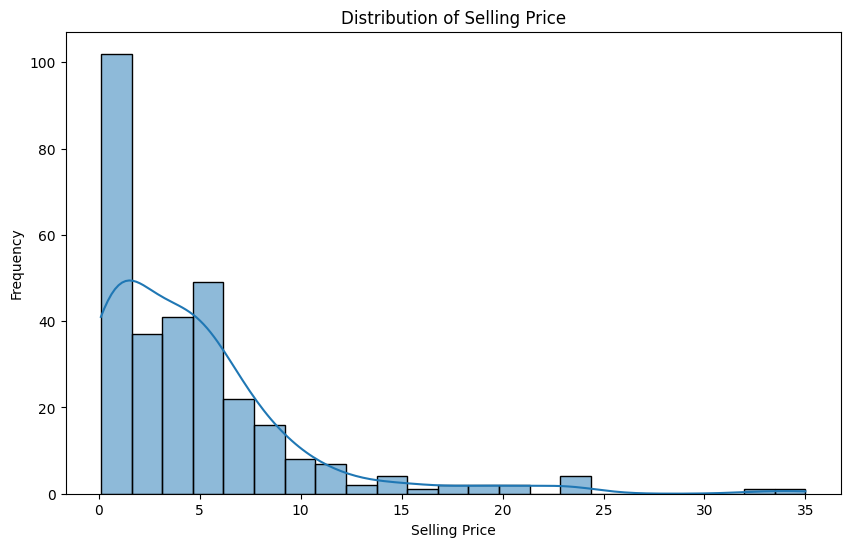

In [34]:
# Plot the distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

## Visualize the relationship between Selling Price and Present Price

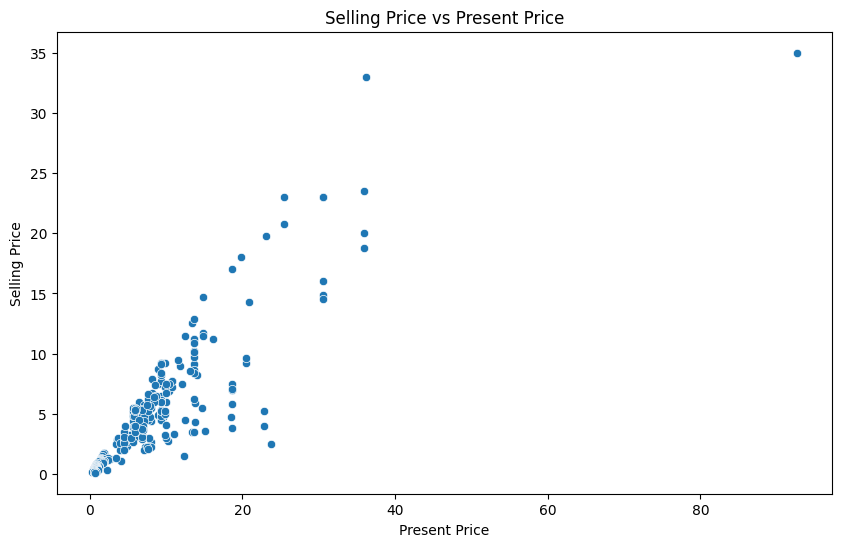

In [35]:
# Plot the relationship between Selling Price and Present Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

## Visialize the Distribution of Selling Prices

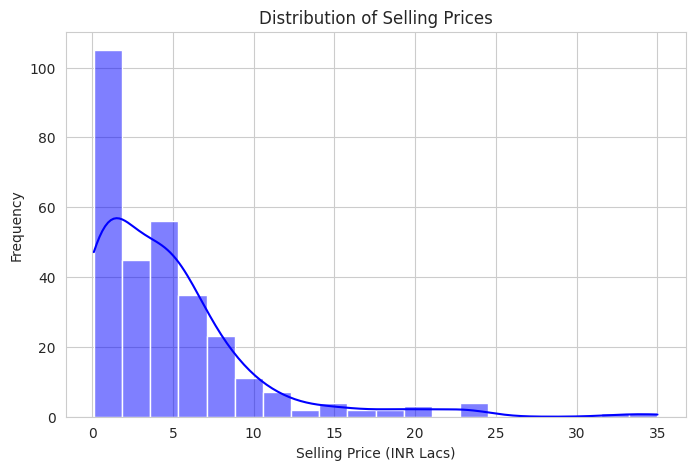

In [37]:
# Set style for plots
sns.set_style("whitegrid")

# Selling Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(car_data["Selling_Price"], bins=20, kde=True, color="blue")
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price (INR Lacs)")
plt.ylabel("Frequency")
plt.show()

## Visualize the Year vs. Selling Price

/tmp/ipykernel_3971/1922411425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=car_data["Year"], y=car_data["Selling_Price"], palette="coolwarm")


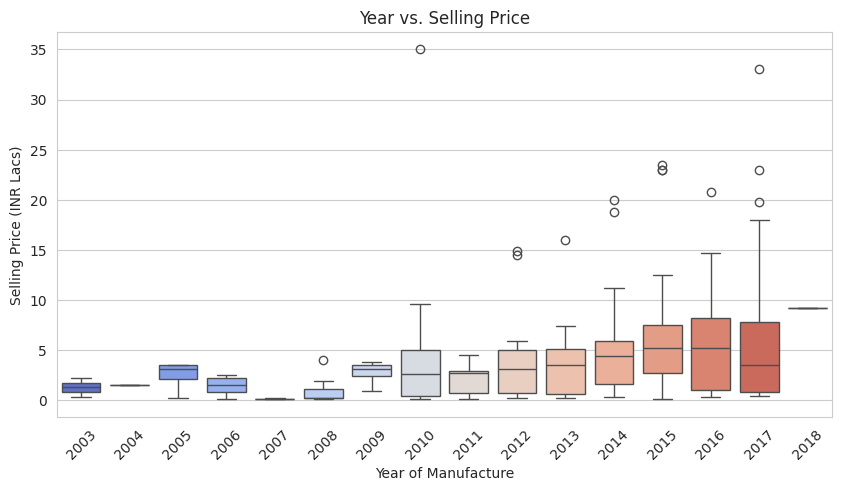

In [38]:
# Year vs. Selling Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=car_data["Year"], y=car_data["Selling_Price"], palette="coolwarm")
plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (INR Lacs)")
plt.xticks(rotation=45)
plt.show()

## Visualize Seller Type Impact on Selling Price

/tmp/ipykernel_3971/3487813035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Seller_Type", y="Selling_Price", data=car_data, palette="Set2")


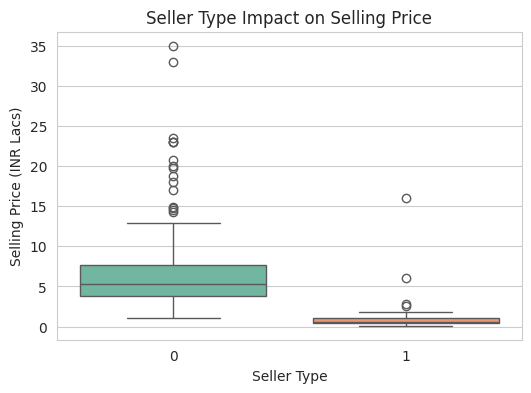

In [40]:
# Seller Type vs. Selling Price
plt.figure(figsize=(6, 4))
sns.boxplot(x="Seller_Type", y="Selling_Price", data=car_data, palette="Set2")
plt.title("Seller Type Impact on Selling Price")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price (INR Lacs)")
plt.show()

In [ ]:
# Transmission Type vs. Selling Price
plt.figure(figsize=(6, 4))
sns.boxplot(x="Transmission", y="Selling_Price", data=car_data, palette="muted")
plt.title("Transmission Type Impact on Selling Price")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price (INR Lacs)")
plt.show()

## Conclusion


Based on the analysis of the given dataset, we can draw the following insights:

1. **Selling Price Distribution**: Most cars are sold at lower price points, with only a few high-value cars.

2. **Manufacturing Year Impact**: Older cars tend to have lower selling prices, with newer models retaining more value.

3. **Fuel Type Trends**: Petrol cars dominate the dataset, while Diesel and CNG cars are in the minority.

4. **Seller Type Influence**: Cars sold by dealers generally have a higher price compared to individual sellers.

5. **Transmission Impact**: Automatic cars tend to have higher prices, likely due to their premium nature compared to manual cars.


These insights can be useful for buyers and sellers to understand price trends in the used car market.